# chap1.5 Feature Detection and Description

## 1.5.1 Understanding Features

## 1.5.2 Harris Corner Detection

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
filename = 'chessboard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [7]:
filename = 'chessboard2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

def nothing(x):
    pass

cv2.namedWindow('image')

cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

In [9]:
filename = 'chessboard2.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv2.imwrite('subpixel5.png',img)

True

## 1.5.3 Shi-Tomasi Corner Detector & Good Features to Track 


In [12]:
img = cv2.imread('chessboard2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

###  SIFT

In [4]:
img = cv2.imread('home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('sim0.png')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(Text(0.5, 1.0, 'imgsift'), ([], []), ([], []))

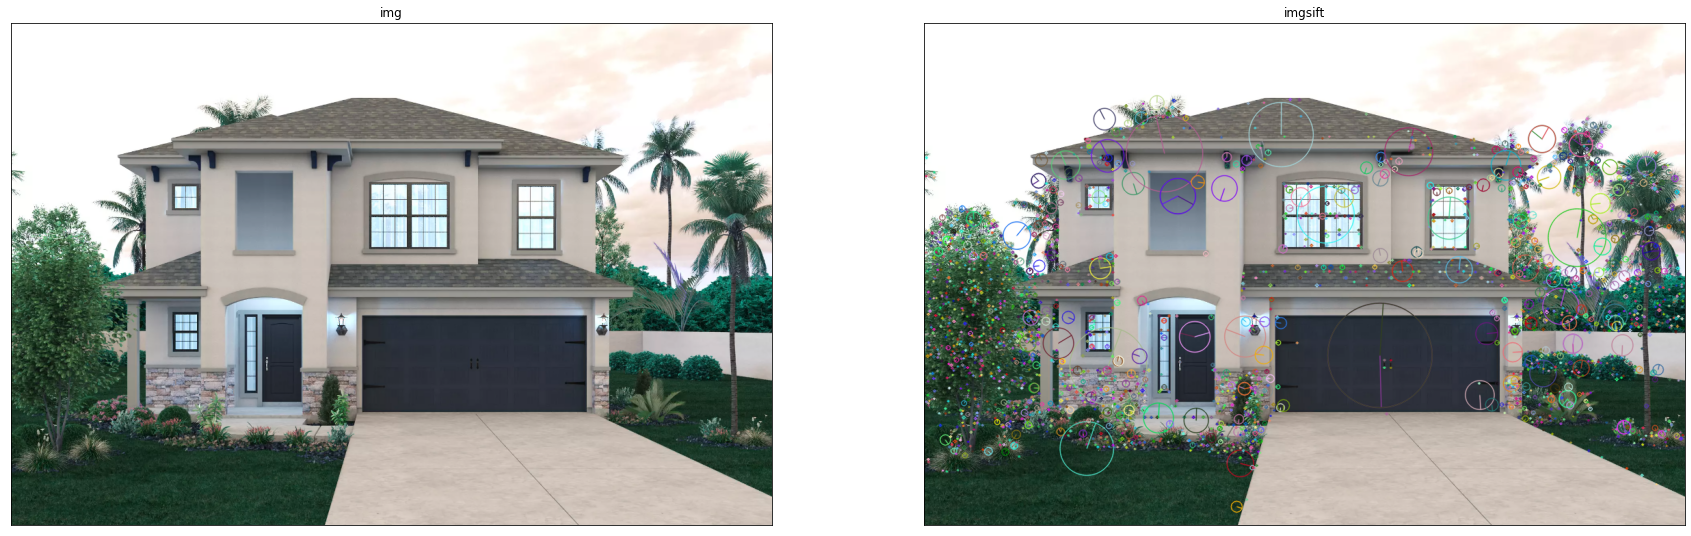

In [5]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])


## 1.5.5 ~ #1.5.8 
#### skip - 특허